# Housing Pricing Data Analysis

## Project Overview
For this project, I use EDA and linear regression to create an algorithm that creates insights for a business stakeholder.

## Business Understanding
This project utilizes a King County(Washington) house sales dataset to model the price of homes in the area using multiple linear regression modeling.

My chosen stakeholder is a hypothetical real estate firm that specializes in "flipping" homes, which involves the purchase, upgrading, and selling of homes.

The purpose of this project is to provide advice to this real estate firm on what home renovations may increase the values of the homes already owned, and at what prices to purchase and upgrade other homes in King County areas. 

## Data Understanding
The data comes from the King County House Sales dataset. 
The data includes: 
- Home Sale Price 
- Number of Bedrooms / Bathrooms 
- Sqft of living area 
- Sqft of Lot 
- Year built  
- Year rennovated 
- Sqft of area living area and lot
- Floors
- Zipcode

## Load and Train/Test Split Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, ShuffleSplit


In [2]:
house_df = pd.read_csv('data\kc_house_data.csv')

In [3]:
#Prediction target is the price of the home
target = house_df['price']
X = house_df.drop('price', axis = 1)

In [4]:
#Split time!
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42)

In [5]:
## Creating train df to check correlations with price
tot_train = pd.concat([y_train, X_train], axis=1)

## Data Visualization

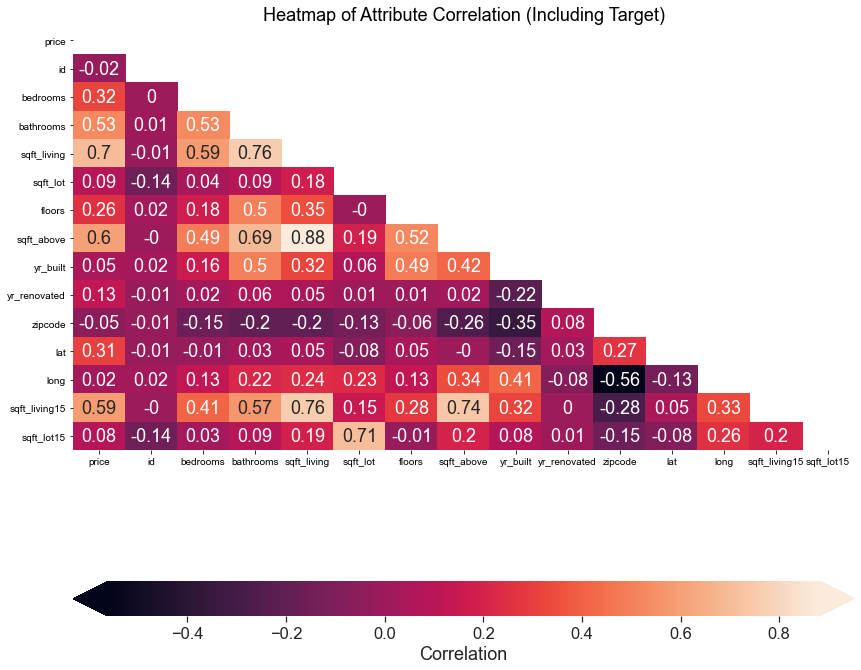

In [6]:
# Create a df with the target as the first column,
# then compute
corr = tot_train.corr().round(2)

# Set up figure and axes
fig, ax = plt.subplots(figsize=(14, 12))
sns.set(font_scale = 1.5)

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax, annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)
ax.set_title("Heatmap of Attribute Correlation (Including Target)");

According to this correlation heatmap, the variable most correlated to price is the square feet of livable area. 

In [7]:
# Name the highest correlated variable.
highest_cor = 'sqft_living'

(0.0, 3000000.0)

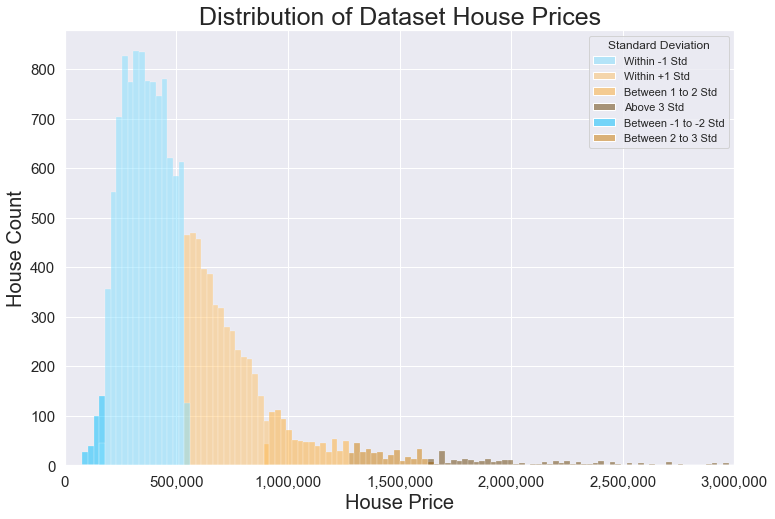

In [8]:

df = tot_train
chosen_column = 'price'

#Calculate mean and standard deviation
mn = df[chosen_column].mean()
std = df[chosen_column].std()

# Create Standard Deviation Bands
std_m1 = mn - std
std_m2 = mn - (2*std)
std_m3 = mn - (3*std)
std_p1 = mn + std
std_p2 = mn + (2*std)
std_p3 = mn + (3*std)


# Conditions
conditions = [ 
    (df[chosen_column] > std_p3),
    (df[chosen_column] > std_p2) & (df[chosen_column] < std_p3),
    (df[chosen_column] > std_p1) & (df[chosen_column] < std_p2),
    (df[chosen_column] > mn) & (df[chosen_column] < std_p1),
    (df[chosen_column] > std_m1) & (df[chosen_column] < mn),
    (df[chosen_column] > std_m2) & (df[chosen_column] < std_m1),
    (df[chosen_column] > std_m3) & (df[chosen_column] < std_m2),
    (df[chosen_column] < std_m3)
]

# List of values
values = ['Above 3 Std', 'Between 2 to 3 Std', 'Between 1 to 2 Std', 
        'Within +1 Std', 'Within -1 Std', 'Between -1 to -2 Std', 
        'Between -2 to -3 Std', 'Below -3 Std']

#new column to assign variables
df['Standard Deviation'] = np.select(conditions, values)

# color palette
# You can use https://www.w3schools.com/colors/colors_picker.asp

color_dict = {'Above 3 Std': '#663d00', 'Between 2 to 3 Std' : '#cc7a00', 
            'Between 1 to 2 Std': '#ffad33',
            'Within +1 Std' :'#ffc266', 'Within -1 Std': '#80dfff', 
            'Between -1 to -2 Std' : '#00bfff', 
            'Between -2 to -3 Std' : '#006080', 'Below -3 Std' : '#002633' }



#------------------------------------------------------#
# Plot the Distribution
sns.set_theme(style = 'darkgrid')
f, ax = plt.subplots(figsize=(12,8))


# Create histogram
sns.histplot(data = tot_train, x="price", 
            hue = 'Standard Deviation', palette = color_dict)

# Format
plt.xlabel( "House Price", fontsize = 20)
plt.ylabel("House Count", fontsize=20)
plt.title("Distribution of Dataset House Prices", size = 25)
ax.tick_params(labelsize = 15)

#Change from scientific to plain labels
plt.ticklabel_format(style='plain', axis='x') 

#Add commas for thousands
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

#Set plot x-axis area
plt.xlim(left = 0, right = 3000000)

(0.0, 3000000.0)

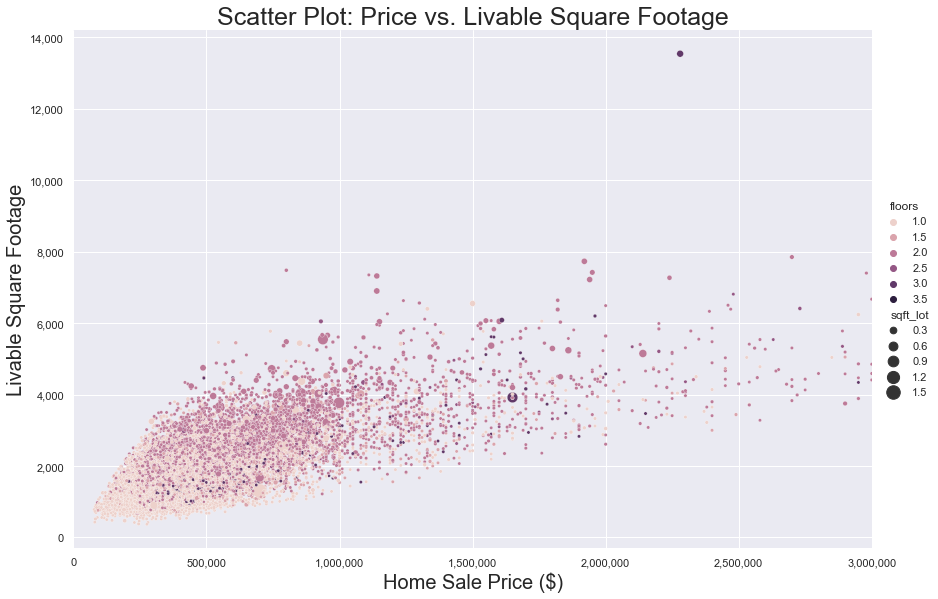

In [9]:
sns.set_theme(style="darkgrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=tot_train,
    x="price", y=highest_cor,
    hue="floors", size="sqft_lot", sizes=(10, 200),
    height=8, aspect=1.5,
)
g.set(xscale="linear", yscale="linear")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

#Label
plt.xlabel( "Home Sale Price ($)", fontsize = 20)
plt.ylabel("Livable Square Footage", fontsize=20)
plt.title("Scatter Plot: Price vs. Livable Square Footage", fontsize = 25)


#Change from scientific to plain labels
plt.ticklabel_format(style='plain', axis='x') 

#Add commas for thousands
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim(left = 0, right = 3000000)


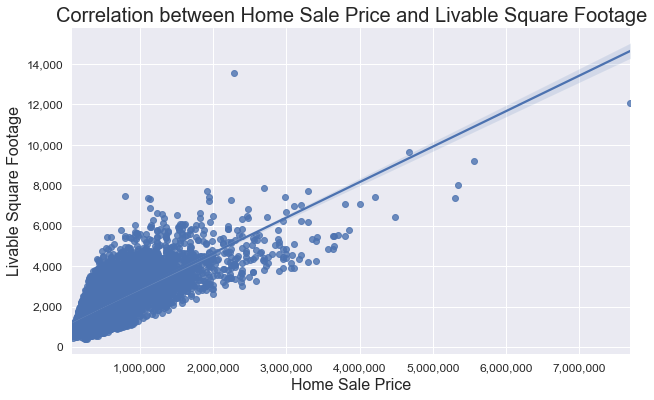

In [10]:
# Correlation between Home Sale Price and Livable Square Footage

sns.set_theme(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f, left=True, bottom=True)

sns.regplot(x="price", y=highest_cor,
                data=tot_train, ax=ax)

plt.title("Correlation between Home Sale Price and Livable Square Footage", size = 20)
plt.xlabel("Home Sale Price", size = 16)
plt.ylabel("Livable Square Footage", size = 16)
ax.tick_params(labelsize = 12)

#Change from scientific to plain labels
plt.ticklabel_format(style='plain', axis='x') 

#Add commas for thousands
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

## Model 1: Baseline Model

In [11]:
# Creating and testing the first baseline model, based only on
# one variable.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit


baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[highest_cor]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4895269677689762
Validation score: 0.4935530672243642


We got a validation score slightly above .5, which is not bad to start.

## Model 2: Numerical Model

In [12]:
X_train_num = X_train.copy()

X_train_num.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6405,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,8 Good,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114
937,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,7 Average,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151
19076,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,9 Better,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542
15201,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,7 Average,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880
13083,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,8 Good,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606


### Preprocessing Training Data

This look at the data lets us take a look at the possible features. There are some features that stand out to me as being specifically not helpful: 
    - id (it is a unique identifier, not a numeric feature)
    - lattitude
    - longitude
    - zipcode

While the location data may be helpful, I want to look at it in a simpler way, by city.
To do this, I need to add a city feature that uses zipcodes to correspond to the city. 

### Change Zip Codes to Cities

In [13]:
#list zips and make dataframe of them
all_zips = X_train.zipcode.unique().tolist()
zips_df = pd.DataFrame(all_zips)
zips_df['Zipcode'] = zips_df[0]
zips_df.drop(columns = 0)

,Zipcode
0,98029
1,98042
2,98027
3,98117
4,98055
...,...
65,98188
66,98007
67,98178
68,98148


In [14]:
#Load zipcodes-to-cities data
zip_cities = pd.read_csv('data/washington_zipcodes.csv')
zip_cities.head()

,Zipcode,Type,City,County,State
0,98001,Standard,Auburn,King County,WA
1,98002,Standard,Auburn,King County,WA
2,98003,Standard,Federal Way,King County,WA
3,98004,Standard,Bellevue,King County,WA
4,98005,Standard,Bellevue,King County,WA


In [15]:
# Join the zip_cities dataframe with the all_zips dataframe to identify cities using inner join

zip_to_city= pd.merge(zips_df, zip_cities, how = 'inner', on = 'Zipcode')
zip_to_city = zip_to_city.drop(columns = [0, 'Type', 'County', 'State'])
zip_to_city.rename(columns={'Zipcode' : 'zipcode'}, inplace= True )

zip_to_city.head()


,zipcode,City
0,98029,Issaquah
1,98042,Kent
2,98027,Issaquah
3,98117,Seattle
4,98055,Renton


In [16]:
# Add city to the housing data. 
X_train_num = pd.merge(X_train_num, zip_to_city, how = 'left', on = "zipcode")
X_train_num

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,...,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114,Issaquah
1,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,...,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151,Kent
2,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,...,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542,Issaquah
3,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,...,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880,Seattle
4,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,...,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606,Kent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,7853230570,9/15/2014,3,2.50,2230,5800,2.0,NO,NONE,Average,...,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088,Snoqualmie
16193,4140940150,10/2/2014,4,2.75,2770,3852,2.0,NO,NONE,Average,...,2770,0.0,2014,NaN,98178,47.5001,-122.232,1810,5641,Seattle
16194,8658300480,7/21/2014,4,1.50,1530,9000,1.0,NO,NONE,Good,...,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500,Carnation
16195,1723049033,6/20/2014,1,0.75,380,15000,1.0,NO,NONE,Average,...,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000,Seattle


In [17]:
#create another vizualization dataframe
viz_2 = pd.concat([y_train, X_train_num], axis=1)

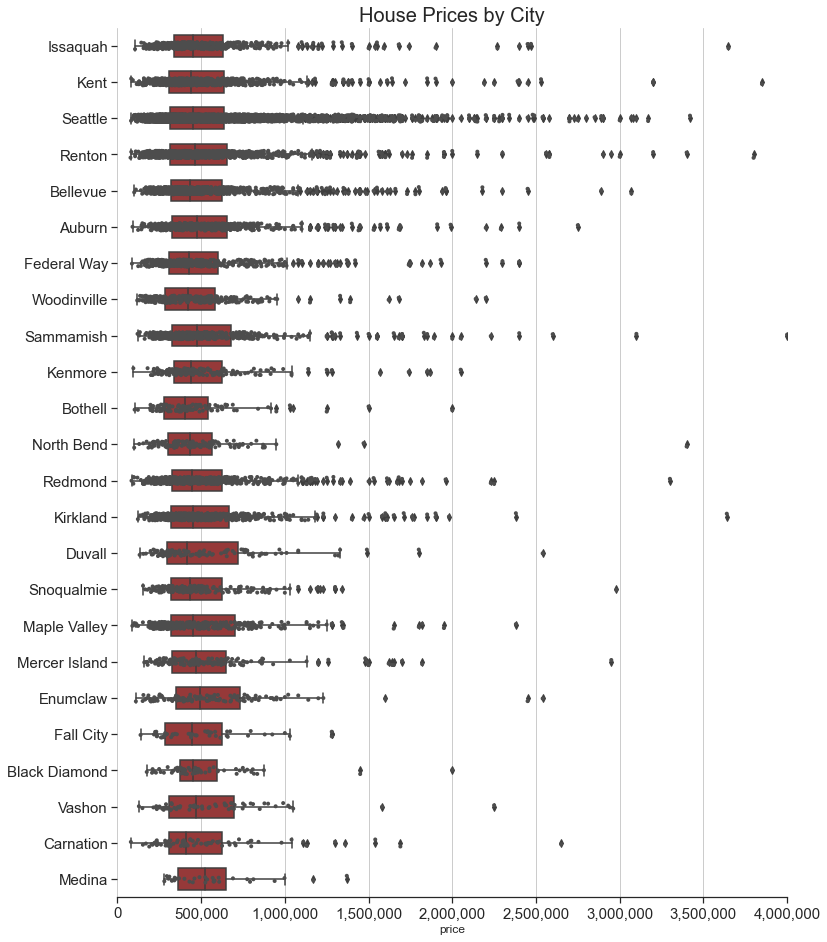

In [18]:
# Distribution of Prices by City
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(12, 16))
sns.set(font_scale = 1.5)

# Plot with horizontal boxes
sns.boxplot(x="price", y="City", data=viz_2,width=.6, color = 'brown')

# Add observations
sns.stripplot(x="price", y="City", data=viz_2,size=4, color=".3", linewidth=0)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

# Format
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlim=(0, 4000000))

plt.title('House Prices by City', fontsize = 20)
sns.despine(trim=True, left=True)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))



In [19]:
#Median home price by city
group_df = viz_2.groupby('City')['price'].agg(['median', 'count', 'mean','std']).reset_index()
group_df.head()

,City,median,count,mean,std
0,Auburn,475000.0,515,545480.636893,330253.666986
1,Bellevue,436000.0,763,529397.771953,338059.947641
2,Black Diamond,454000.0,62,514192.580645,287301.719657
3,Bothell,405000.0,105,461746.523810,274902.591321
4,Carnation,412250.0,77,541615.584416,401812.440556


No handles with labels found to put in legend.


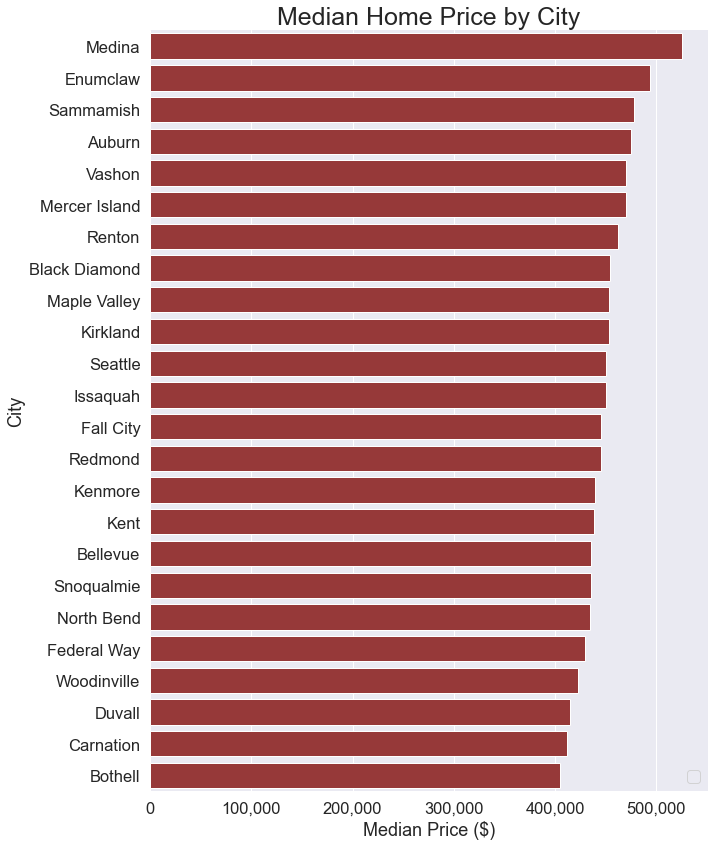

In [20]:
group_df = group_df.sort_values('median', ascending= False)

sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 14))

sns.barplot(x="median", y="City", data=group_df,
             color = 'brown')


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="City", xlabel="Median Price ($)")
sns.despine(left=True, bottom=True)
plt.title("Median Home Price by City", size = 25)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

In [21]:
X_train_num

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,...,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114,Issaquah
1,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,...,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151,Kent
2,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,...,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542,Issaquah
3,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,...,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880,Seattle
4,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,...,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606,Kent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,7853230570,9/15/2014,3,2.50,2230,5800,2.0,NO,NONE,Average,...,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088,Snoqualmie
16193,4140940150,10/2/2014,4,2.75,2770,3852,2.0,NO,NONE,Average,...,2770,0.0,2014,NaN,98178,47.5001,-122.232,1810,5641,Seattle
16194,8658300480,7/21/2014,4,1.50,1530,9000,1.0,NO,NONE,Good,...,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500,Carnation
16195,1723049033,6/20/2014,1,0.75,380,15000,1.0,NO,NONE,Average,...,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000,Seattle


In [22]:
#Get list of cities
cities = X_train_num.City.unique().tolist()

In [23]:
#Use OneHotEncoder to hot encode the categorical variables (cities)

from sklearn.preprocessing import OneHotEncoder
city_train = X_train_num[['City']]
ohe = OneHotEncoder(categories= 'auto', drop = 'first', sparse= False, handle_unknown= 'error')
ohe.fit(city_train)
ohe.categories_

[array(['Auburn', 'Bellevue', 'Black Diamond', 'Bothell', 'Carnation',
        'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Issaquah',
        'Kenmore', 'Kent', 'Kirkland', 'Maple Valley', 'Medina',
        'Mercer Island', 'North Bend', 'Redmond', 'Renton', 'Sammamish',
        'Seattle', 'Snoqualmie', 'Vashon', 'Woodinville'], dtype=object)]

In [24]:
city_encoded_train = ohe.transform(city_train)

In [25]:
ohe.categories_[0][1:]

array(['Bellevue', 'Black Diamond', 'Bothell', 'Carnation', 'Duvall',
       'Enumclaw', 'Fall City', 'Federal Way', 'Issaquah', 'Kenmore',
       'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island',
       'North Bend', 'Redmond', 'Renton', 'Sammamish', 'Seattle',
       'Snoqualmie', 'Vashon', 'Woodinville'], dtype=object)

In [26]:
X_train_num.head(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,...,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114,Issaquah
1,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,...,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151,Kent
2,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,...,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542,Issaquah
3,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,...,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880,Seattle
4,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,...,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606,Kent
5,7841300285,8/11/2014,1,1.50,1048,4800,1.0,NO,NONE,Average,...,1048,0.0,1942,0.0,98055,47.4759,-122.212,950,4800,Renton
6,7861000021,4/29/2015,3,1.75,1820,78408,1.0,NO,NONE,Average,...,1220,600.0,1950,0.0,98042,47.3364,-122.128,1340,78408,Kent
7,4128500380,4/27/2015,4,2.50,4280,12796,2.0,NO,NONE,Average,...,3400,880.0,1999,0.0,98006,47.5588,-122.124,3520,9593,Bellevue
8,4219400520,6/16/2014,4,2.25,3040,5000,2.0,NO,GOOD,Good,...,2080,960.0,1926,0.0,98105,47.6565,-122.278,2870,5000,Seattle
9,9274200314,8/21/2014,3,2.50,1740,1279,3.0,NO,NONE,Average,...,1740,0.0,2008,NaN,98116,47.5891,-122.387,1740,1280,Seattle


In [27]:
X_train_num = X_train_num.drop(columns= [('City')])

In [28]:
city_encoded_train = pd.DataFrame(city_encoded_train, columns = ohe.categories_[0][1:],index = X_train_num.index)

city_encoded_train

,Bellevue,Black Diamond,Bothell,Carnation,Duvall,Enumclaw,Fall City,Federal Way,Issaquah,Kenmore,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16194,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
cities = city_encoded_train.columns
cities

Index(['Bellevue', 'Black Diamond', 'Bothell', 'Carnation', 'Duvall',
       'Enumclaw', 'Fall City', 'Federal Way', 'Issaquah', 'Kenmore', 'Kent',
       'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island', 'North Bend',
       'Redmond', 'Renton', 'Sammamish', 'Seattle', 'Snoqualmie', 'Vashon',
       'Woodinville'],
      dtype='object')

In [30]:
# Get it all back together
X_train_num = pd.concat([X_train_num, city_encoded_train], axis = 1)
X_train_num

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,7853230570,9/15/2014,3,2.50,2230,5800,2.0,NO,NONE,Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16193,4140940150,10/2/2014,4,2.75,2770,3852,2.0,NO,NONE,Average,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16194,8658300480,7/21/2014,4,1.50,1530,9000,1.0,NO,NONE,Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16195,1723049033,6/20/2014,1,0.75,380,15000,1.0,NO,NONE,Average,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


From this chart, we can see that different cities have pretty distinct distributions, which may help us with achieving our goal. The cities of Medina, Mercer Island, and Bellevue are are especially different from the rest of the distributions. 

In [31]:
# Drop irrelevant columns
X_train_num = X_train_num.drop(columns = ['lat', 'long', 'id', 'zipcode'])
X_train_num.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,8 Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,7 Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,9 Better,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,7 Average,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,8 Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Identify Missing Values

In [32]:
#Identify columns with missing values
missing = X_train_num.isna().sum()
missing_df = pd.DataFrame(missing)
missing_df = missing_df.loc[missing_df[0] > 0]
missing_df



,0
waterfront,1756
view,49
yr_renovated,2879


### Fix Missing Values

In [33]:
# Deal with waterfront missing values by turning them to "No"
X_train_num.waterfront = X_train_num.waterfront.fillna('NO')

# Now deal with missing "view"
X_train_num.view = X_train_num.view.fillna('NONE')

# Deal with year rennovated NANs... drop the column? too many?
X_train_num= X_train_num.drop(columns = ['yr_renovated'])



### Turn all Values to Numeric

In [34]:
# The "grade" column has too much info, we just need the number grade.
X_train_num['grade'] = X_train_num['grade'].str[0:1]
X_train_num.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Now, we must fix the "condition" into a grading system
X_train_num.condition.unique()

array(['Average', 'Very Good', 'Good', 'Fair', 'Poor'], dtype=object)

From the unique function, we can see that there are 5 possible outcomes. Let's change these 5 outcomes to numerical outcomes. 

In [36]:
X_train_num['condition'].replace({'Poor': 1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5},inplace=True)

# Make Waterfront a categorical variable of either 0 or 1
X_train_num['waterfront'] = np.where(X_train_num['waterfront'] == 'YES', 1, 0)
X_train_num.head()


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,3/4/2015,3,2.50,1880,4499,2.0,0,NONE,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10/7/2014,3,2.50,2020,6564,1.0,0,NONE,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/16/2015,5,4.00,4720,493534,2.0,0,NONE,5,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3/30/2015,2,2.00,1430,3880,1.0,0,NONE,4,7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10/14/2014,3,2.25,2270,32112,1.0,0,NONE,4,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Now, we must fix the "view" into a grading system
X_train_num.view.unique()

array(['NONE', 'GOOD', 'AVERAGE', 'EXCELLENT', 'FAIR'], dtype=object)

In [38]:
#Adding numerical values
X_train_num['view'].replace({'NONE': 0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4},inplace=True)
X_train_num.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,3/4/2015,3,2.50,1880,4499,2.0,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10/7/2014,3,2.50,2020,6564,1.0,0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/16/2015,5,4.00,4720,493534,2.0,0,0,5,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3/30/2015,2,2.00,1430,3880,1.0,0,0,4,7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10/14/2014,3,2.25,2270,32112,1.0,0,0,4,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:

# Get rid of date, column
X_train_num = X_train_num.drop(columns= ['date'])

# Changing objects to int or float
X_train_num['grade'] = X_train_num['grade'].astype(float)

# Replace ? values with 0 in sqft_basement
X_train_num['sqft_basement'].replace({'?': 0},inplace=True)
X_train_num['sqft_basement'] = X_train_num['sqft_basement'].astype(float)

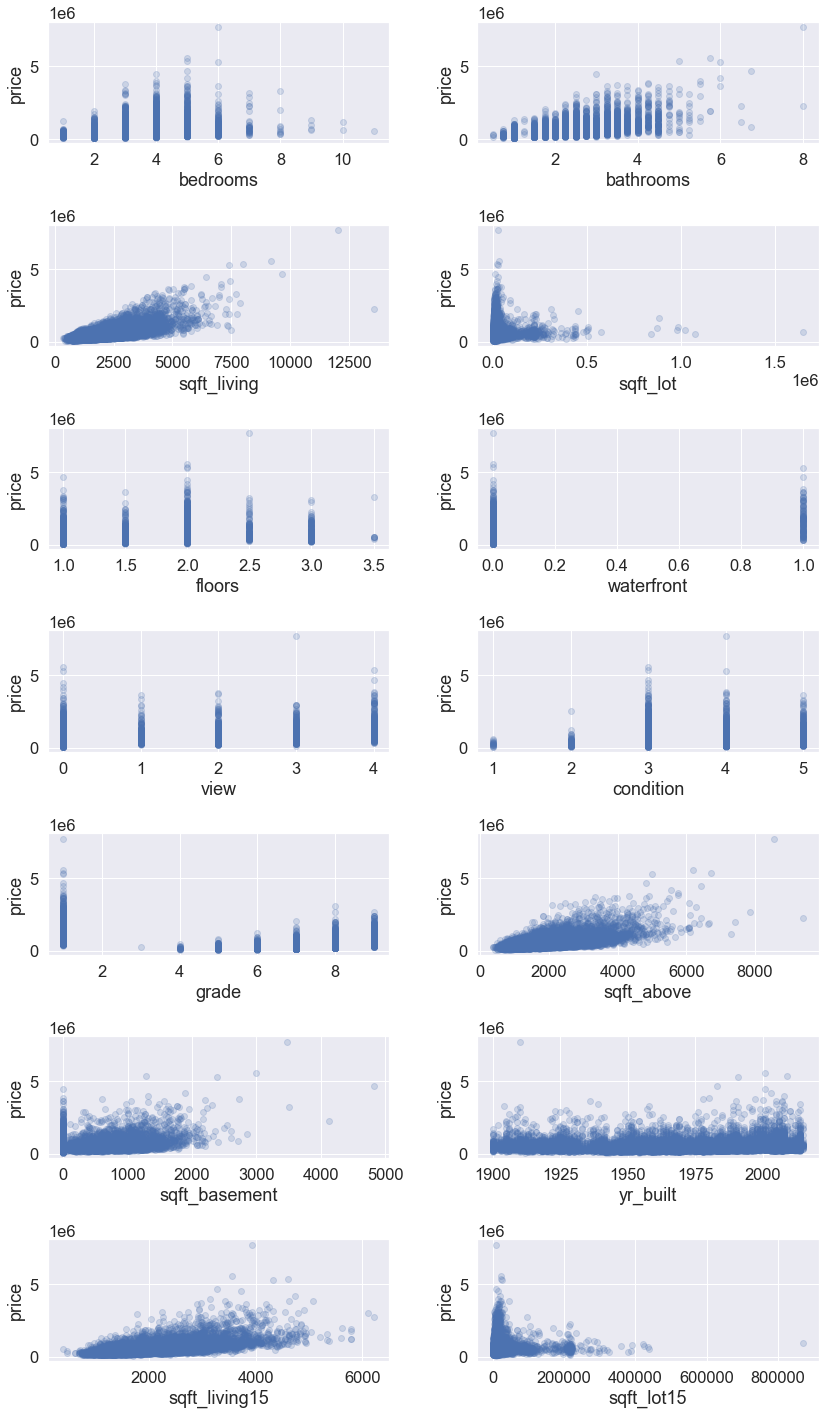

In [40]:
# Check scatterplots for categorical variables
scatterplot_data = X_train_num.drop(cities, axis=1)

fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(12, 20))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//2][index%2]
    ax.scatter(X_train_num[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

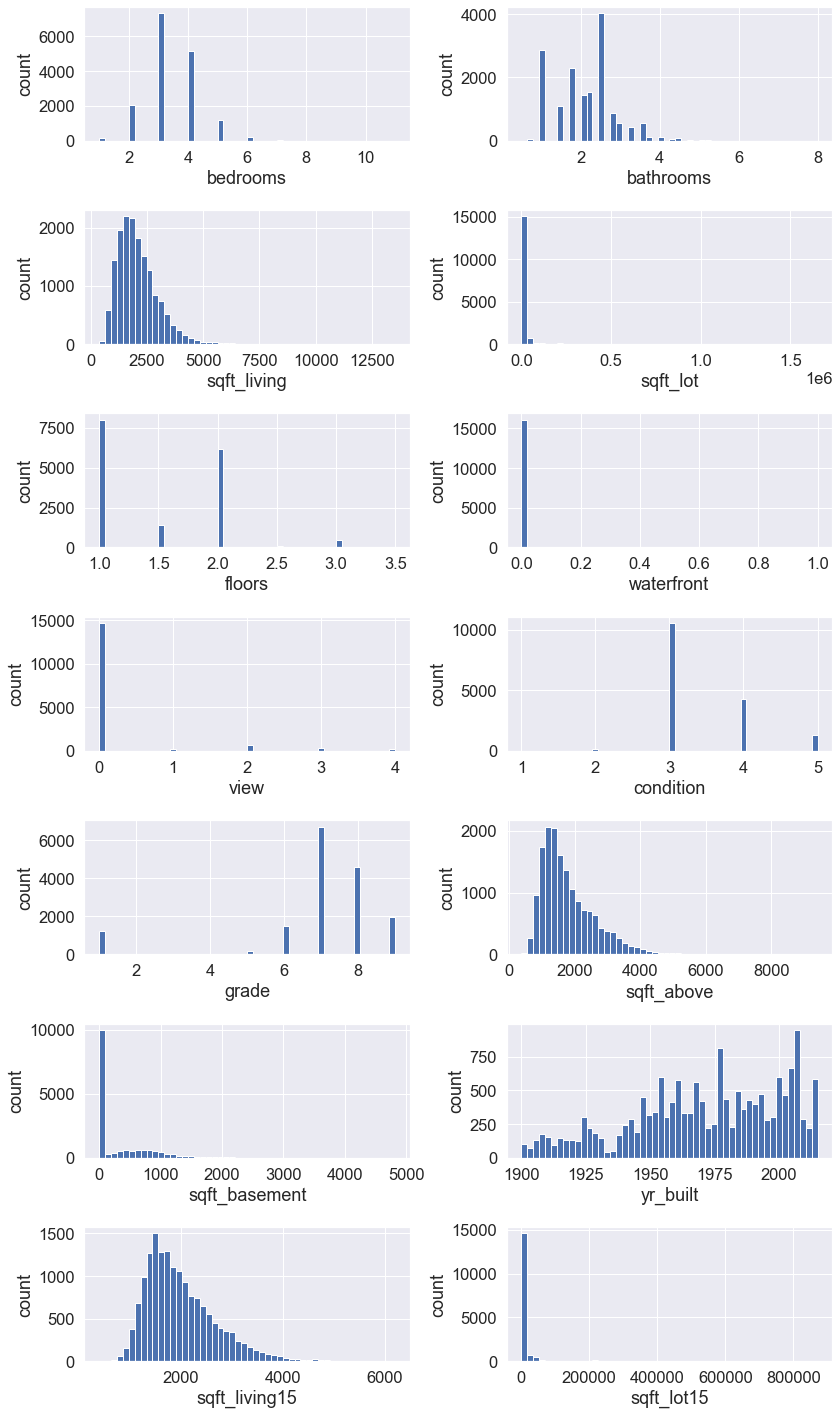

In [41]:
# Checking Variable Distributions for Normality

fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(12, 20))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//2][index%2]
    ax.hist(X_train_num[col], bins = 50)
    ax.set_xlabel(col)
    ax.set_ylabel('count')


### Ready the Second Model

In [42]:
model_2 = X_train_num
model_2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,3,2.50,1880,4499,2.0,0,0,3,8.0,1880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,2.50,2020,6564,1.0,0,0,3,7.0,1310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,4.00,4720,493534,2.0,0,0,5,9.0,3960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2.00,1430,3880,1.0,0,0,4,7.0,1430,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,2.25,2270,32112,1.0,0,0,4,8.0,1740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:

second_model_scores = cross_validate(
    estimator=LinearRegression(),
    X=model_2,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7286710302500642
Validation score: 0.7093151249836778

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


### Test Model 2

In [44]:

y_train = list(y_train) #read that this would fix a problem online

sm.OLS(y_train, sm.add_constant(model_2)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1147.
Date:                Fri, 06 May 2022   Prob (F-statistic):               0.00
Time:                        10:45:50   Log-Likelihood:            -2.2005e+05
No. Observations:               16197   AIC:                         4.402e+05
Df Residuals:                   16159   BIC:                         4.405e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.028e+06   1.54e+05     19.710      0.000    2.73e+06    3.33e+06
bedrooms      -4.095e+04   2193.122    -18.670      0.000   -4.52e+04   -3.66e+04
bathrooms      5.481e+04   3597.240     15.237      0.000    4.78e+04    6.19e+04
sqft_living     132.0419     21.067      6.268      0.000      90.748     173.336
sqft_lot          0.1444      0.053      2.707      0.007       0.040       0.249
floors         4.899e+04   4098.149     11.955      0.000     4.1e+04     5.7e+04
waterfront     5.811e+05   2.01e+04     28.949      0.000    5.42e+05     6.2e+05
view            5.02e+04   2357.650     21.294      0.000    4.56e+04    5.48e+04
condition      2.748e+04   2593.736     10.595      0.000    2.24e+04    3.26e+04
grade         -1.987e+04    861.860    -23.054      0.000   -2.16e+04   -1.82e+04
sqft_above       72.7080     21.063      3.452      0.001      31.421     113.995
sqft_basement    39.3034     20.865      1.884      0.060      -1.595      80.202
yr_built      -1640.2976     77.418    -21.187      0.000   -1792.046   -1488.549
sqft_living15    63.7283      3.806     16.745      0.000      56.268      71.188
sqft_lot15       -0.4128      0.084     -4.926      0.000      -0.577      -0.249
Bellevue       3.747e+05   9844.048     38.059      0.000    3.55e+05    3.94e+05
Black Diamond  6.762e+04   2.28e+04      2.972      0.003     2.3e+04    1.12e+05
Bothell        1.225e+05   1.77e+04      6.909      0.000    8.78e+04    1.57e+05
Carnation      1.142e+05   2.07e+04      5.516      0.000    7.37e+04    1.55e+05
Duvall         8.007e+04   1.81e+04      4.433      0.000    4.47e+04    1.15e+05
Enumclaw       1.808e+04   1.68e+04      1.074      0.283   -1.49e+04    5.11e+04
Fall City      1.769e+05   2.56e+04      6.906      0.000    1.27e+05    2.27e+05
Federal Way   -2329.0379   1.09e+04     -0.213      0.831   -2.37e+04    1.91e+04
Issaquah       1.831e+05   1.12e+04     16.418      0.000    1.61e+05    2.05e+05
Kenmore        1.218e+05   1.53e+04      7.982      0.000    9.19e+04    1.52e+05
Kent           1.499e+04   9935.933      1.509      0.131   -4485.765    3.45e+04
Kirkland       2.774e+05   1.04e+04     26.647      0.000    2.57e+05    2.98e+05
Maple Valley   2.555e+04    1.2e+04      2.134      0.033    2086.658     4.9e+04
Medina         1.293e+06   3.17e+04     40.807      0.000    1.23e+06    1.35e+06
Mercer Island  5.075e+05   1.55e+04     32.647      0.000    4.77e+05    5.38e+05
North Bend     1.138e+05   1.64e+04      6.946      0.000    8.17e+04    1.46e+05
Redmond        2.257e+05   1.05e+04     21.577      0.000    2.05e+05    2.46e+05
Renton         6.637e+04   9357.308      7.092      0.000     4.8e+04    8.47e+04
Sammamish      1.692e+05   1.11e+04     15.225      0.000    1.47e+05    1.91e+05
Seattle        2.338e+05   8233.208     28.394   

## Model 3 - Significant Features Only

In [45]:
significant_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                            'waterfront', 'view', 'condition', 'grade','sqft_above', 
                            'yr_built', 'sqft_living15', 'sqft_lot15', 'Seattle',
                            'Kenmore', 'Sammamish', 'Redmond','Federal Way', 'Maple Valley',
                            'Bellevue', 'Mercer Island', 'Kent', 'Issaquah',
                            'Kirkland', 'North Bend', 'Woodinville', 'Enumclaw', 'Fall City',
                            'Bothell', 'Carnation', 'Medina']

In [46]:
third_model = LinearRegression()
X_train_third_model = model_2[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7276650450108691
Validation score: 0.7083560781449147

Second Model
Train score:      0.7286710302500642
Validation score: 0.7093151249836778

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


The third model achieved a slighty worse validation score, so I will not include it in the final stakeholder presentation. Instead, I will work on a new final model (below), which uses more, but not all, data. 

### Preprocess Test Data

### Drop Irrelevant Columns / Handle Missing Values / Convert Categorical Features to Numbers

In [47]:
X_test = X_test.drop(columns = ['lat', 'long'])

# Deal with waterfront missing values by turning them to "No"
X_test.waterfront = X_test.waterfront.fillna('NO')

# Now deal with missing "view"
X_test.view = X_test.view.fillna('NONE')

# Deal with year rennovated NANs
X_test.yr_renovated = X_test.yr_renovated.fillna(0)

# The "grade" column has too much info, we just need the number grade.
X_test['grade'] = X_test['grade'].str[0:1]

#Fix condition
X_test['condition'].replace({'Poor': 1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5},inplace=True)

# Make Waterfront a categorical variable of either 0 or 1
X_test['waterfront'] = np.where(X_test['waterfront'] == 'YES', 1, 0)

#Turn view into grading system
X_test['view'].replace({'NONE': 0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4},inplace=True)

# Get rid of date,id and zipcode columns
X_test = X_test.drop(columns= ['id', 'date'])

# Changing objects to int or float
X_test['grade'] = X_test['grade'].astype(float)

# Replace ? values in sqft_basement
X_test['sqft_basement'].replace({'?': 0},inplace=True)
X_test['sqft_basement'] = X_test['sqft_basement'].astype(float)

# Add all cities 
X_test = pd.merge(X_test, zip_to_city, how = 'left', on = "zipcode")
X_test


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,City
0,3,0.75,850,8573,1.0,0,0,3,6.0,600,250.0,1945,0.0,98146,850,8382,Seattle
1,3,1.00,1510,6083,1.0,0,0,4,6.0,860,650.0,1940,0.0,98115,1510,5712,Seattle
2,4,2.25,1790,42000,1.0,0,0,3,7.0,1170,620.0,1983,0.0,98045,2060,50094,North Bend
3,2,1.50,1140,2500,1.0,0,1,3,7.0,630,510.0,1988,0.0,98106,1500,5000,Seattle
4,3,1.00,1500,3920,1.0,0,0,3,7.0,1000,500.0,1947,0.0,98107,1640,4017,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,5,1.00,1170,6757,1.0,0,0,4,6.0,800,370.0,1944,0.0,98125,1590,6794,Seattle
5396,3,1.75,1670,5100,1.0,0,2,5,7.0,990,680.0,1954,0.0,98144,2140,4452,Seattle
5397,4,2.25,3260,4640,2.0,0,0,5,9.0,2360,900.0,1907,0.0,98112,3240,5800,Seattle
5398,4,5.00,5820,13906,2.0,0,0,3,1.0,3750,2070.0,1993,0.0,98042,2980,13000,Kent


In [48]:

city_test = X_test[['City']]
ohe = OneHotEncoder(categories= 'auto', drop = 'first', sparse= False, handle_unknown= 'error')
ohe.fit(city_test)
ohe.categories_


[array(['Auburn', 'Bellevue', 'Black Diamond', 'Bothell', 'Carnation',
        'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Issaquah',
        'Kenmore', 'Kent', 'Kirkland', 'Maple Valley', 'Medina',
        'Mercer Island', 'North Bend', 'Redmond', 'Renton', 'Sammamish',
        'Seattle', 'Snoqualmie', 'Vashon', 'Woodinville'], dtype=object)]

In [49]:
city_encoded_test = ohe.transform(city_test)
X_test = X_test.drop(columns= [('City')])
city_encoded_test = pd.DataFrame(city_encoded_test, columns = ohe.categories_[0][1:],index = X_test.index)

In [50]:
# Get it all back together
X_test = pd.concat([X_test, city_encoded_test], axis = 1)
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,3,0.75,850,8573,1.0,0,0,3,6.0,600,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,1.00,1510,6083,1.0,0,0,4,6.0,860,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4,2.25,1790,42000,1.0,0,0,3,7.0,1170,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1.50,1140,2500,1.0,0,1,3,7.0,630,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,1.00,1500,3920,1.0,0,0,3,7.0,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,5,1.00,1170,6757,1.0,0,0,4,6.0,800,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5396,3,1.75,1670,5100,1.0,0,2,5,7.0,990,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5397,4,2.25,3260,4640,2.0,0,0,5,9.0,2360,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5398,4,5.00,5820,13906,2.0,0,0,3,1.0,3750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Selecting Features with sklearn

In [51]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler


X_train_for_RFECV = StandardScaler().fit_transform(X_train_num)
model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(model_2.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_basement: True
yr_built: True
sqft_living15: True
sqft_lot15: True
Bellevue: True
Black Diamond: True
Bothell: True
Carnation: True
Duvall: True
Enumclaw: True
Fall City: True
Federal Way: True
Issaquah: True
Kenmore: True
Kent: True
Kirkland: True
Maple Valley: True
Medina: True
Mercer Island: True
North Bend: True
Redmond: True
Renton: True
Sammamish: True
Seattle: True
Snoqualmie: True
Vashon: True
Woodinville: True


## Model 4 - Dropping Sqft Lot

In [52]:
# Taking the algorithms suggestion of dropping sqft lot
better_model = X_train_num.drop(columns='sqft_lot')

In [53]:
final_cols = list(better_model.columns)

In [54]:
X_train_final = X_train_num[final_cols]
X_test_final = X_test[final_cols]

In [55]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.7102066289976499

### Calculate RMSE

In [56]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

199398.0105372108

For the average home, this linear regression algorithm would be off by almost $200,000. 

### Fourth Model Interpretation

In [57]:
coef = pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients")
co_df = pd.DataFrame(coef)
print("Intercept:", final_model.intercept_)

Intercept: 3041797.2791441707


In [58]:

# Check the coefficients
co_df = co_df.apply(lambda x: '%.2f' % x, axis=1)
co_df

bedrooms          -41072.66
bathrooms          54857.67
sqft_living          132.07
floors             48752.87
waterfront        580218.41
view               50394.33
condition          27368.92
grade             -19918.13
sqft_above            73.50
sqft_basement         39.67
yr_built           -1646.42
sqft_living15         63.16
sqft_lot15            -0.27
Bellevue          374230.32
Black Diamond      67783.25
Bothell           122440.08
Carnation         115427.92
Duvall             80135.47
Enumclaw           20172.27
Fall City         179703.97
Federal Way        -2602.11
Issaquah          183304.73
Kenmore           121667.82
Kent               15210.60
Kirkland          277109.45
Maple Valley       25694.15
Medina           1291602.29
Mercer Island     506922.64
North Bend        116358.94
Redmond           225859.51
Renton             66408.84
Sammamish         169071.70
Seattle           233333.78
Snoqualmie         45754.33
Vashon             47424.11
Woodinville       14

In [59]:
# Make a dataframe to check the specific city coefficients.
city_list = [ 'Seattle','Kenmore', 'Sammamish', 'Redmond','Federal Way', 'Maple Valley',
             'Bellevue', 'Mercer Island', 'Kent', 'Issaquah',
            'Kirkland', 'North Bend', 'Woodinville', 'Enumclaw', 'Fall City',
             'Bothell', 'Carnation', 'Medina']

co_df = pd.DataFrame(co_df[city_list])

In [60]:
co_df = co_df.reset_index()

In [61]:
co_df = co_df.sort_values(0, ascending= False)
co_df = co_df.rename(columns={0 : 'Value_added'})
co_df['Value_added'] = pd.to_numeric(co_df['Value_added'])
co_df = co_df.sort_values('Value_added', ascending= False)
co_df

,index,Value_added
17,Medina,1291602.29
7,Mercer Island,506922.64
6,Bellevue,374230.32
10,Kirkland,277109.45
0,Seattle,233333.78
3,Redmond,225859.51
9,Issaquah,183304.73
14,Fall City,179703.97
2,Sammamish,169071.70
12,Woodinville,140160.57


No handles with labels found to put in legend.


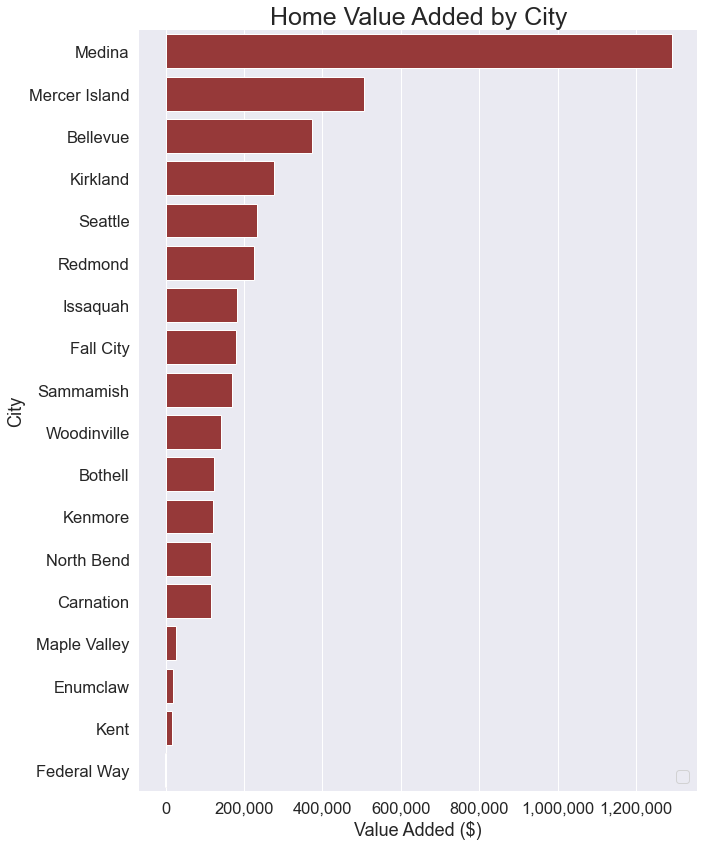

In [62]:

sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 14))


#plot
sns.barplot(x="Value_added", y="index", data=co_df,
             color = 'brown')


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="City", xlabel="Value Added ($)")
sns.despine(left=True, bottom=True)
plt.title("Home Value Added by City", size = 25)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


### Checking the Assumptions

### Checking Linearity

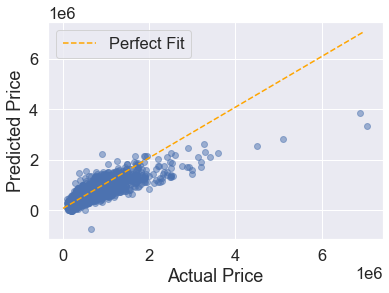

In [63]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

This is fairly linear, although it deviates the higher the home price is.

### Normality

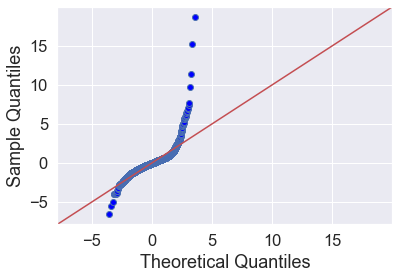

In [64]:
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

It seems we are violating the normality assumption

### Molticollinearity

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X_train_final)
VIF = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
VIF

const            10299.313674
bedrooms             1.723126
bathrooms            3.333402
sqft_living        163.407395
floors               2.141428
waterfront           1.197352
view                 1.419447
condition            1.243896
grade                1.176520
sqft_above         132.675721
sqft_basement       36.928135
yr_built             2.248970
sqft_living15        2.960348
sqft_lot15           1.287747
Bellevue             2.517215
Black Diamond        1.125259
Bothell              1.218156
Carnation            1.183205
Duvall               1.212096
Enumclaw             1.268883
Fall City            1.126219
Federal Way          1.842315
Issaquah             1.826279
Kenmore              1.312796
Kent                 2.212670
Kirkland             2.031360
Maple Valley         1.627543
Medina               1.079533
Mercer Island        1.369171
North Bend           1.261587
Redmond              2.060024
Renton               2.629187
Sammamish            1.949245
Seattle   

There are many variables which have a score above 5, making them too high in terms of multicollinearity. 

### Homoscedasticity

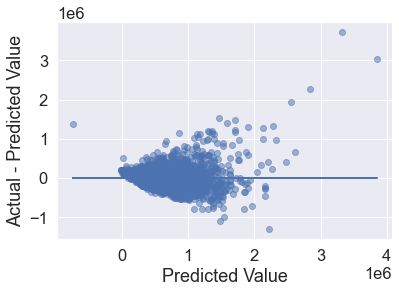

In [66]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

## Model 5: Normalizing Variables

### Model 5: Log Normalization

In [67]:
#Choose non-normal distributions
non_normal = ['sqft_living', 'sqft_lot', 'sqft_above', 
                'sqft_lot15', 'bedrooms', 'bathrooms',
                'floors', 'grade', 'condition', 'price']
log_df = X_train_num.copy()

In [68]:
y2 = pd.Series(y_train)
log_df = pd.concat([y2, log_df], axis=1)
log_df['price'] = log_df[0]

In [69]:
log_df.isna().sum()

0                0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
Bellevue         0
Black Diamond    0
Bothell          0
Carnation        0
Duvall           0
Enumclaw         0
Fall City        0
Federal Way      0
Issaquah         0
Kenmore          0
Kent             0
Kirkland         0
Maple Valley     0
Medina           0
Mercer Island    0
North Bend       0
Redmond          0
Renton           0
Sammamish        0
Seattle          0
Snoqualmie       0
Vashon           0
Woodinville      0
price            0
dtype: int64

#### Process New DF For Log Normalization

In [70]:
#Log Transformation
for feat in non_normal:
    log_df[feat] = log_df[feat].map(lambda x: np.log(x))


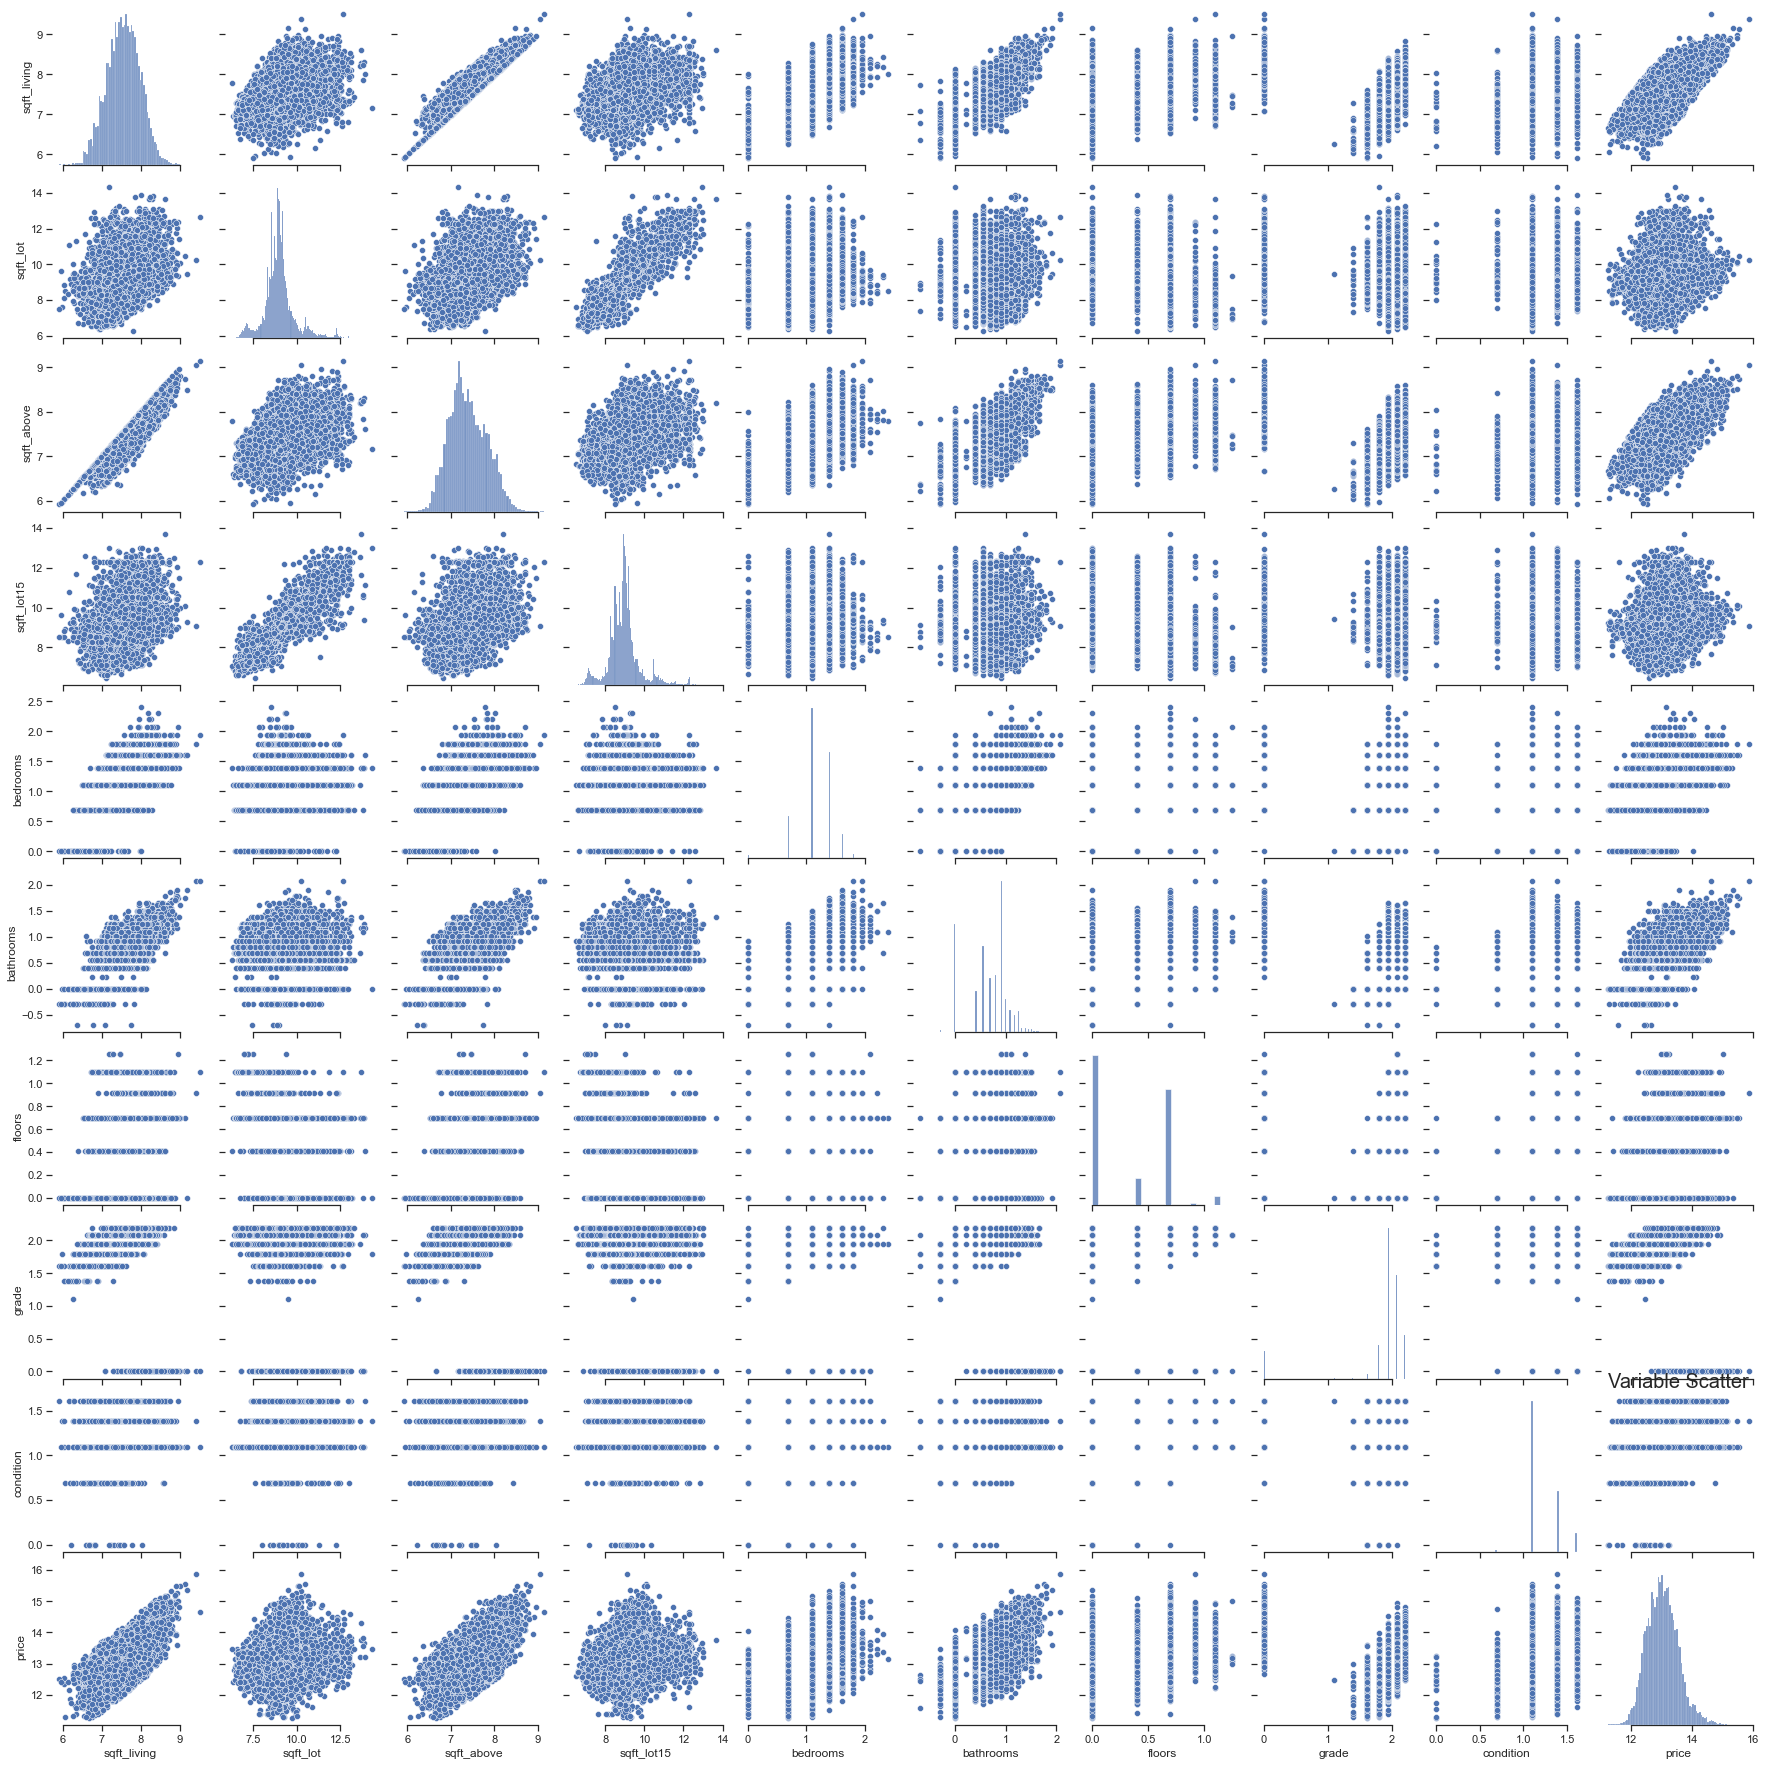

In [98]:
# Check at newly logged distributions
sns.set_theme(style="ticks")
sns.pairplot(log_df[non_normal])
plt.title('Variable Scatter', fontsize = 20)
sns.despine(trim=True, left=True)



In [72]:
colz=pd.DataFrame(log_df.columns)
colz = colz.drop([0])

In [73]:
colz = colz[0].tolist()

In [74]:
X = log_df.drop(columns= [('price')] )
y = log_df['price']

In [75]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model= sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     3504.
Date:                Fri, 06 May 2022   Prob (F-statistic):               0.00
Time:                        10:46:32   Log-Likelihood:                 5389.6
No. Observations:               16197   AIC:                        -1.070e+04
Df Residuals:                   16158   BIC:                        -1.040e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.5280      0.153     75.294      0.000      11.228      11.828
0              9.948e-07   6.93e-09    143.461      0.000    9.81e-07    1.01e-06
bedrooms         -0.0749      0.007    -11.322      0.000      -0.088      -0.062
bathrooms         0.0614      0.006      9.590      0.000       0.049       0.074
sqft_living       0.6406      0.018     36.182      0.000       0.606       0.675
sqft_lot          0.0116      0.004      2.879      0.004       0.004       0.020
floors            0.0702      0.006     11.210      0.000       0.058       0.083
waterfront       -0.2363      0.019    -12.715      0.000      -0.273      -0.200
view              0.0116      0.002      5.379      0.000       0.007       0.016
condition         0.1071      0.008     12.698      0.000       0.091       0.124
grade             0.0754      0.003     25.282      0.000       0.070       0.081
sqft_above       -0.3486      0.016    -21.405      0.000      -0.381      -0.317
sqft_basement    -0.0002   8.44e-06    -26.105      0.000      -0.000      -0.000
yr_built         -0.0009   7.06e-05    -12.475      0.000      -0.001      -0.001
sqft_living15   6.42e-05   3.53e-06     18.209      0.000    5.73e-05    7.11e-05
sqft_lot15       -0.0240      0.004     -5.432      0.000      -0.033      -0.015
Bellevue          0.3767      0.009     40.762      0.000       0.359       0.395
Black Diamond     0.1863      0.021      9.057      0.000       0.146       0.227
Bothell           0.2910      0.016     18.170      0.000       0.260       0.322
Carnation         0.2247      0.019     12.022      0.000       0.188       0.261
Duvall            0.2209      0.016     13.549      0.000       0.189       0.253
Enumclaw          0.0677      0.015      4.474      0.000       0.038       0.097
Fall City         0.2897      0.023     12.567      0.000       0.245       0.335
Federal Way       0.0075      0.010      0.765      0.444      -0.012       0.027
Issaquah          0.3416      0.010     33.700      0.000       0.322       0.361
Kenmore           0.2682      0.014     19.468      0.000       0.241       0.295
Kent              0.0353      0.009      3.944      0.000       0.018       0.053
Kirkland          0.3640      0.010     37.964      0.000       0.345       0.383
Maple Valley      0.1077      0.011      9.971      0.000       0.086       0.129
Medina           -0.0823      0.030     -2.740      0.006      -0.141      -0.023
Mercer Island     0.3451      0.014     23.894      0.000       0.317       0.373
North Bend        0.2445      0.015     16.487      0.000       0.215       0.274
Redmond           0.3693      0.010     38.570      0.000       0.351       0.388
Renton            0.1611      0.008     19.053      0.000       0.145       0.178
Sammamish         0.3656      0.010     36.203   

## Conclusion
According to the final model, these are the best ideas I have for increasing the value of a home:
- The addition of each bathroom makes a home around $55,000 more valuable.
- The living space is also valuable. Adding more livable space makes a home $132 more valuable for each square foot added.
- The condition of a home is also valuable. Upgrading a home's overall condition (on a scale from 1-10) adds around $27,500 (rounded) to the homes value per increase in scale.
- Location by city was one of, if not the, most important points in determining the value of a home. For instance, if a home is in Medina, over $1,000,000 is added to the starting price of the home. On the other hand, a home located in the city of Federal Way is worth around $200,000 less. 

Log normalization provided a strong increase in R-squared.
- The log normalized model had a final R-squared of .89

### Next steps
I would like to try to take steps to fix the high level of multicollinearity. 
I would also like more data. For example, I have always heard that remodelling the kitchen is typically a high-ROI move. We had no kitchen or appliance data in this dataset. If we had more data about what was in the house, we could find more items that could help.
Some of these data items may include size and quality of kitchen and appliances, size and quality of garden, distance to schools and public transportation, and walkability scores, to name a few. 